# Data Explorer via XAI

This tutorial demonstrats how to explorer different types of data using `xai.data.explorer`. 

We have supported the following types of data:
 - Categorical
 - Numerical
 - Free Text
 - Datetime

In [1]:
# Some auxiliary imports for the tutorial
import sys
import pandas as pd
import numpy as np
from collections import Counter
from sklearn import datasets
import matplotlib.pyplot as plt
sys.path.append('../../')
import xai

We use the following datasets as samples to demonstrate the above analyzers:
 - [Breast cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer): demonstration for `xai.data.explorer.categorical`
 - [Iris plants dataset](https://scikit-learn.org/stable/datasets/index.html#iris-plants-dataset): demonstration for `xai.data.explorer.numerical`
 - [The 20 newsgroups text dataset](https://scikit-learn.org/stable/datasets/index.html#the-20-newsgroups-text-dataset): demonstration for `xai.data.explorer.text`
 - Self-generated dataset: demonstration for `xai.data.explorer.datetime`

## 1. Categorical
`xai.data.explorer.categorical`

In [2]:
# load dataset
cols_names = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 
              'deg-malig', 'breast', 'breast-quad', 'irradiat']
# read the data
breast_data = pd.read_csv('sample_data/breast-cancer.data', header=None, 
                 names=cols_names).replace({'?': 'unknown'})  # NaN are represented by '?'

breast_data.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [3]:
from xai.data.explorer.categorical.labelled_categorical_analyzer import LabelledCategoricalDataAnalyzer

In [4]:
def plot_labelled_categorical_stats(labelled_stats, all_stats, label_column, feature_column):
    x = list(all_stats.frequency_count.keys())
    counter = Counter({label:0 for label in x})
    legends = []
    plots = []
    
    plt.figure(figsize=(16,4))
    plt.subplot(121)
    for _class, _stats in labelled_stats.items():
        frequency = _stats.frequency_count
        bottom = [dict(counter)[key] for key in x]
        height = [frequency[key] for key in x]
        p = plt.bar(height=height, x=x, bottom=bottom)
        counter.update(Counter(frequency))
        legends.append(_class)
        plots.append(p)
    plt.legend(plots,legends)
    plt.title('Distribution: %s - %s'%(label_column,feature_column))
    plt.xlabel(feature_column)
    
    plt.subplot(122)
    plt.bar(height=all_stats.frequency_count.values(), x=all_stats.frequency_count.keys())
    plt.title('All Distribution')
    plt.xlabel(feature_column)
    plt.show()

['left_low', 'right_up', 'left_up', 'right_low', 'central', 'unknown']


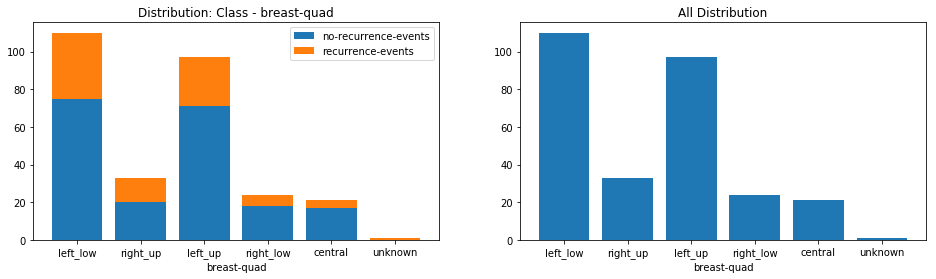

In [5]:
label_column = 'Class'
feature_column = 'breast-quad'
labelled_analyzer = LabelledCategoricalDataAnalyzer()
labelled_analyzer.feed_all(breast_data[feature_column].tolist(),breast_data[label_column].tolist())
labelled_stats, all_stats = labelled_analyzer.get_statistics()
plot_labelled_categorical_stats(labelled_stats, all_stats, label_column, feature_column)

['left_low', 'right_up', 'left_up', 'right_low', 'central', 'unknown']


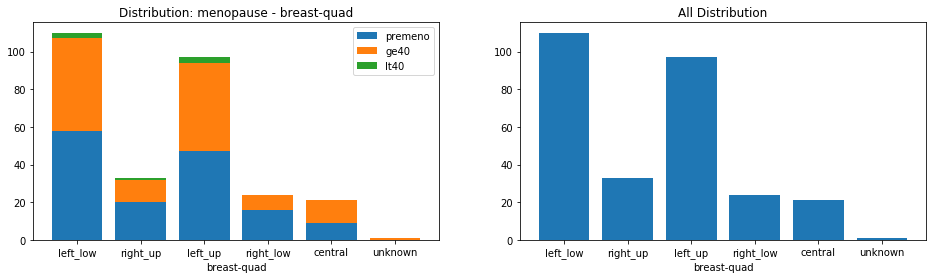

In [6]:
label_column = 'menopause'
feature_column = 'breast-quad'
labelled_analyzer = LabelledCategoricalDataAnalyzer()
labelled_analyzer.feed_all(breast_data[feature_column].tolist(),breast_data[label_column].tolist())
labelled_stats, all_stats = labelled_analyzer.get_statistics()
plot_labelled_categorical_stats(labelled_stats, all_stats, label_column, feature_column)

## 2. Numerical

`xai.data.explorer.numerical` 

In [7]:
# load dataset
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_data['Class'] = iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
from xai.data.explorer.numerical.labelled_numerical_analyzer import LabelledNumericalDataAnalyzer

In [20]:
def get_labelled_numerical_stats(labelled_stats, all_stats, label_column, feature_column):
    
    labelled_stats_table = []
    plt.figure(figsize=(16,4))
    plt.subplot(131)
    legends = []
    plots = []
    for _class, _stats in labelled_stats.items():
        hist = _stats.histogram
        kde = np.array([[x,y] for (x,y) in _stats.kde])
        x = [i[0] for i in hist]
        w = [(i[1]-i[0]) for i in hist]
        h = [i[2] for i in hist]
        x_ticks = ["%.2f-%.2f"%(i[0],i[1]) for i in hist[1:-1]]
        x_tick_locs = [(i[0]+i[1])*0.5 for i in hist[1:-1]]
        p = plt.bar(x=x, height=h, width=w, align='edge',alpha=0.4)
        legends.append(_class)
        plots.append(p)
        labelled_stats_table.append({'class':_class,'min':_stats.min, 'max':_stats.max, 'mean':_stats.mean,'median':_stats.sd, 'sd':_stats.max, 'total_count':_stats.total_count})
    plt.legend(plots,legends)
    plt.title('Distribution: %s - %s'%(label_column,feature_column))
    plt.xlabel(feature_column)

    plt.subplot(132)
    hist = all_stats.histogram
    x = [i[0] for i in hist]
    w = [(i[1]-i[0])*0.9 for i in hist]
    h = [i[2] for i in hist]
    x_ticks = ["%.2f-%.2f"%(i[0],i[1]) for i in hist]
    x_tick_locs = [(i[0]+i[1])*0.5 for i in hist]
    plt.bar(x=x, height=h, width=w, align='edge',alpha=0.8)
    plt.xticks(x_tick_locs,x_ticks, rotation=45)
    plt.title('All Distribution')
    plt.xlabel(feature_column)
    labelled_stats_table.append({'class':'all','min':all_stats.min, 'max':all_stats.max, 'mean':all_stats.mean,'median':all_stats.sd, 'sd':all_stats.max, 'total_count':all_stats.total_count})

    plt.subplot(133)
    legends = []
    plots = []
    for _class, _stats in labelled_stats.items():
        kde = np.array([[x,y] for (x,y) in _stats.kde])
        plt.plot(kde[:,0],kde[:,1])
        legends.append(_class)
        plots.append(p)
    plt.xlabel(feature_column)

    kde = np.array([[x,y] for (x,y) in all_stats.kde])
    plt.plot(kde[:,0],kde[:,1],'--')
    legends.append('all')
    plt.legend(legends)
    plt.title('KDE: %s - %s'%(label_column,feature_column))
    
    plt.show()
    
    _stats_df = pd.DataFrame.from_records(labelled_stats_table)
    return _stats_df

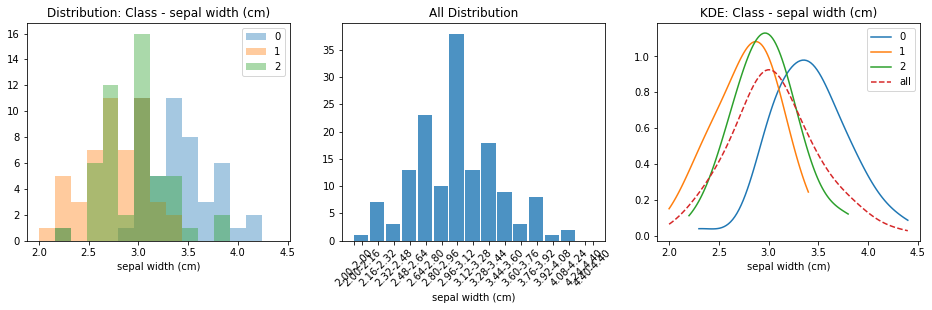

  class  max   mean    median  min   sd  total_count
0     0  4.4  3.418  0.377195  2.3  4.4           50
1     1  3.4  2.770  0.310644  2.0  3.4           50
2     2  3.8  2.974  0.319255  2.2  3.8           50
3   all  4.4  3.054  0.432147  2.0  4.4          150


AttributeError: 'NoneType' object has no attribute 'head'

In [22]:
label_column = 'Class'
feature_column = 'sepal width (cm)'
labelled_analyzer = LabelledNumericalDataAnalyzer()
labelled_analyzer.feed_all(iris_data[feature_column].tolist(),iris_data[label_column].tolist())
labelled_stats, all_stats = labelled_analyzer.get_statistics(extreme_value_percentile=[0,100],num_of_bins=15)
_stats_df = get_labelled_numerical_stats(labelled_stats, all_stats, label_column, feature_column)
_stats_df.head()

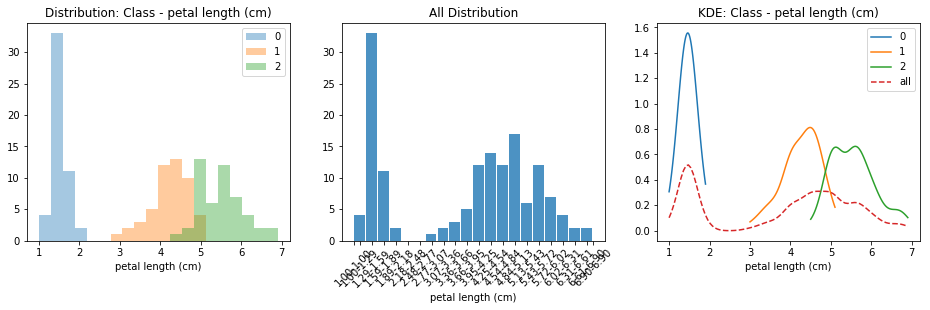

In [11]:
label_column = 'Class'
feature_column = 'petal length (cm)'
labelled_analyzer = LabelledNumericalDataAnalyzer()
labelled_analyzer.feed_all(iris_data[feature_column].tolist(),iris_data[label_column].tolist())
labelled_stats, all_stats = labelled_analyzer.get_statistics(extreme_value_percentile=[0,100],num_of_bins=20)
get_labelled_numerical_stats(labelled_stats, all_stats, label_column, feature_column)